In [1]:
import numpy as np
import os.path
from data import Instance, DataSet
from neural_network import NeuralNetwork
from activation_function import ActivationFunction
import matplotlib.pyplot as plt

### **Questão 01**

#### O primeiro passo é a criação do conjunto de dados, que será usado para treinamento, validação e teste:

In [37]:
data_set_1 = DataSet("data_set_1")
aux = []

if (os.path.isfile(data_set_1.name)):
    data_set_1.loadFile()

else:
    data_set_size_1 = 1000
    for i in range(data_set_size_1):
        x1 = np.round(np.random.sample(3))
        
        phi = np.random.random() * 2.0 * np.pi
        cos_theta = np.random.random() * 2.0 - 1.0
        theta = np.arccos( cos_theta )
        u = np.random.random()
        
        r = 0.1 * np.cbrt( u )
        x = r * np.sin( theta) * np.cos( phi )
        y = r * np.sin( theta) * np.sin( phi )
        z = r * np.cos( theta )
        x2 = [x, y, z]
        x = [i+j for i,j in zip(x1, x2)]

        n = int(x1[0])*4 + int(x1[1])*2 + int(x1[2])
        y = [0.0 for k in range(0,8)]
        y[n] = 1.0

        data_set_1.add( Instance(x, y) )

    data_set_1.saveToFile()

In [ ]:
#Plot data

for instance in data_set_1.data():
    aux.append(instance.input)
    
plt.figure(figsize=(10,10))
plt.title("Square")
plt.xlabel("x")
plt.ylabel("y")
plt.plot([ i[0] for i in aux], [ i[1] for i in aux], 'ro', markersize = 2)

#### Depois, instanciamos uma função de ativação, criamos a rede neural com as características desejadas e executamos

In [ ]:
step_func = ActivationFunction("step")
net = NeuralNetwork(3, [8], [step_func], 0.1)
data = net.trainDataSet(data_set_1, "stochastic", 10, print_info = False, type = "class", tvt_ratio = [7, 2, 1])

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Problem 1 - Step")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(data[0], data[1], 'r', label = "Training")
plt.plot(data[0], data[2], 'b', label = "Validation")
plt.legend(loc = 'center right', bbox_to_anchor = (1.0, 0.7))

In [ ]:
sig_func = ActivationFunction("sigmoid")
net = NeuralNetwork(3, [3, 8], [sig_func, sig_func], 0.1)
data = net.trainDataSet(data_set_1, "stochastic", 100, print_info = False, type = "class", tvt_ratio = [7, 2, 1])

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Problem 1 - Sigmoid")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(data[0], data[1], 'r', label = "Training")
plt.plot(data[0], data[2], 'b', label = "Validation")
plt.legend(loc = 'center right', bbox_to_anchor = (1.0, 0.7))

### **Questão 03 - a**

In [24]:
data_set_3a = DataSet("data_set_3a")
aux = []

if (os.path.isfile(data_set_3a.name)):
    data_set_3a.loadFile()

else:
    data_set_size_3a = 100
    for i in range(0, data_set_size_3a):
        x1 = np.random.randint(0, 2)
        x2 = np.random.randint(0, 2)
        x = [float(x1), float(x2)]
        aux.append(x)

        y = 1.0 if x1 == x2 else 0.0 

        data_set_3a.add( Instance( x, y) )
        
    data_set_3a.saveToFile()

In [ ]:
#Plot data

for instance in data_set_3a.data():
    aux.append(instance.input)
    
plt.figure(figsize=(10, 108))
plt.title("Square")
plt.xlabel("x")
plt.ylabel("y")
plt.plot([ i[0] for i in aux], [ i[1] for i in aux], 'ro', markersize = 2)

### **Questão 03 - b**

In [26]:
data_set_3b = DataSet("data_set_3b")
aux = []

if (os.path.isfile(data_set_3b.name)):
    data_set_3b.loadFile()

else:
    data_set_size_3b = 100
    for i in range(0, data_set_size_3b):
        x = np.random.random() * 4.0
        aux.append(x)

        y = np.sin(x * np.pi) / (x * np.pi)

        data_set_3b.add( Instance( x, y) )
        
    data_set_3b.saveToFile()

In [ ]:
#Plot data

for instance in data_set_3b.data():
    aux.append([instance.input, instance.expected_output])
    
plt.figure(figsize=(16,8))
plt.title("Square")
plt.xlabel("x")
plt.ylabel("y")
plt.plot([ instance.input for instance in data_set_3b.data()], [ instance.expected_output for instance in data_set_3b.data()], 'ro', markersize = 2)

### **Questão 04**

In [32]:
data_set_4 = DataSet("data_set_4")
aux = []

if (os.path.isfile(data_set_4.name)):
    data_set_4.loadFile()

else:
    data_set_size_4 = 1000
    for i in range(0, data_set_size_4):
        t = 2 * np.pi * np.random.sample(1)[0]
        u = np.random.sample(1)[0] + np.random.sample(1)[0]
        r = 2-u if u > 1 else u
        x = [r*np.cos(t), r*np.sin(t)]
        aux.append(x)

        n = 0
        if(x[0] >= 0.0):
            n = 0 if x[1] >= 0.0 else 3
        else:
            n = 1 if x[1] >= 0.0 else 2

        n += 4 if np.absolute(x[1]) > 1.0 - np.absolute(x[0]) else 0

        y = [0.0 for k in range(0,8)]
        y[n] = 1.0

        data_set_4.add( Instance( x, y) )
        
    data_set_4.saveToFile()

In [ ]:
#Plot data

for instance in data_set_4.data():
    aux.append(instance.input)
    
plt.figure(figsize=(10,10))
plt.title("Square")
plt.xlabel("x")
plt.ylabel("y")
plt.plot([ i[0] for i in aux], [ i[1] for i in aux], 'ro', markersize = 2)

In [3]:
sig_func = ActivationFunction("sigmoid")
net = NeuralNetwork(2, [2, 6, 6, 8], [sig_func, sig_func, sig_func, sig_func], 0.15)
data = net.trainDataSet(data_set_4, "stochastic", 500, momentum = 0.5, type = "class", tvt_ratio = [7, 2, 1])

|| Epoch: 500 || |   8   0   0   0   0   0   0   1  |
|   0  10   0   0   0   5   0   0  |
|   0   0  11   0   0   0   2   0  |
|   0   0   0  15   0   0   0   3  |
|   4   0   0   0   8   0   0   0  |
|   0   0   0   0   0   8   0   0  |
|   0   0   2   0   0   0   9   0  |
|   0   0   0   7   0   0   0   7  |

Correct: 76.0%
Incorrect: 24.0%


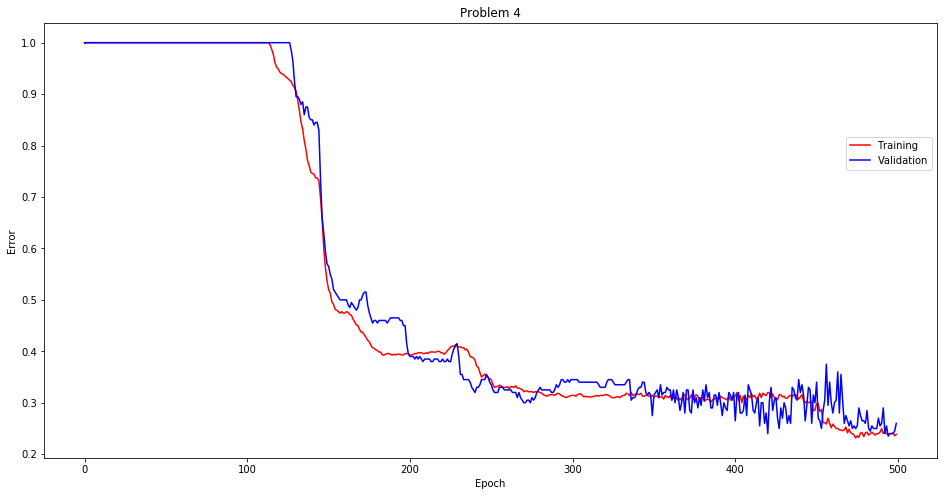

In [4]:
plt.figure(figsize=(16,8))
plt.title("Problem 4")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.plot(data[0], data[1], 'r', label = "Training")
plt.plot(data[0], data[2], 'b', label = "Validation")
plt.legend(loc = 'center right', bbox_to_anchor = (1.0, 0.7))

In [23]:
result_4 = open('result_4.txt', 'w')
for item in data[0]:
  result_4.write("%s\n" % item)
result_4.write("\n")

for item in data[1]:
  result_4.write("%s\n" % item)
result_4.write("\n")

for item in data[2]:
  result_4.write("%s\n" % item)
result_4.write("\n")
result_4.close()


### **Questão 05**

In [16]:
data_set_5 = DataSet("data_set_5")
aux = []

if (os.path.isfile(data_set_5.name)):
    data_set_5.loadFile()

else:
    data_set_size_5 = 100
    for i in range(0, data_set_size_5):
        
        n = np.random.randint(0, 2001)
        x_old = [np.sin(m) for m in range(n-10, n) ]
        x = [np.sin(n-10+idx + x1 * x1) for idx, x1 in enumerate(x_old)]
        
        aux.append(x)

        y_old = [np.sin(m) for m in range(n+1, n+4) ]
        y = [np.sin(n+1+idx + y1 * y1) for idx, y1 in enumerate(y_old)]

        data_set_5.add( Instance( x, y) )
        
    data_set_5.saveToFile()